In [212]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [213]:
df_trainingdata = pd.read_csv("distance_fare_data.csv")

In [214]:
df_trainingdata.head()

,Distance_km,Fare_price
0,37.454012,57.780894
1,95.071431,148.768414
2,73.199394,116.264454
3,59.865848,91.227016
4,15.601864,37.731669


In [215]:
distance_array = np.array(df_trainingdata["Distance_km"])

In [216]:
fare_array = np.array(df_trainingdata["Fare_price"])

In [217]:
def prediction(feature, weight, bias):
    y_hat = (weight*feature) + bias
    return y_hat

In [218]:
def Gradient_computation(Weight,bias):
    m = np.size(distance_array)
    bias_gradient = 0
    weight_gradient = 0
    for i in range(m):
        y_hat = prediction(distance_array[i],Weight,bias)
        error = y_hat - fare_array[i]
        bias_gradient = bias_gradient + error
        weight_gradient = weight_gradient + error*distance_array[i]
    bias_gradient/= m
    weight_gradient/= m
    return weight_gradient, bias_gradient


In [219]:
def Error_calc(Weight,bias):
    total_error = 0
    for i in range(np.size(fare_array)):
        Y_hat =  prediction(distance_array[i],Weight,bias)
        squarred_error = math.pow(fare_array[i] - Y_hat,2)
        total_error += squarred_error
    return total_error/(2*np.size(fare_array))

In [220]:
def gradient_descent(iterations=300000,learning_rate=0.0001):
    Weight = 2.56
    bias = 0.512
    for i in range(iterations):
        Weight_grad, bias_grad = Gradient_computation(Weight,bias)
        Weight = Weight - (learning_rate*Weight_grad)
        bias = bias - (learning_rate*bias_grad)
        new_cost = Error_calc(Weight,bias)
        print(f"Cost after iteration {i+1} is {new_cost}")
    return Weight,bias
    

In [221]:
optimized_weight, optimized_bias = gradient_descent()
print(optimized_weight, optimized_bias)

Cost after iteration 1 is 737.5791352383698
Cost after iteration 2 is 348.3195381505018
Cost after iteration 3 is 168.78143568632274
Cost after iteration 4 is 85.97307011939763
Cost after iteration 5 is 47.77931126030995
Cost after iteration 6 is 30.163124467687666
Cost after iteration 7 is 22.037920640620424
Cost after iteration 8 is 18.29023800121965
Cost after iteration 9 is 16.561597208731378
Cost after iteration 10 is 15.764198052187476
Cost after iteration 11 is 15.396315000846396
Cost after iteration 12 is 15.22653744671243
Cost after iteration 13 is 15.148131994309603
Cost after iteration 14 is 15.111870054643925
Cost after iteration 15 is 15.095045950981856
Cost after iteration 16 is 15.087187155743864
Cost after iteration 17 is 15.083463430430946
Cost after iteration 18 is 15.08164692662899
Cost after iteration 19 is 15.0807100949617
Cost after iteration 20 is 15.080178999359486
Cost after iteration 21 is 15.07983504653291
Cost after iteration 22 is 15.07957741481144
Cost aft

KeyboardInterrupt: 

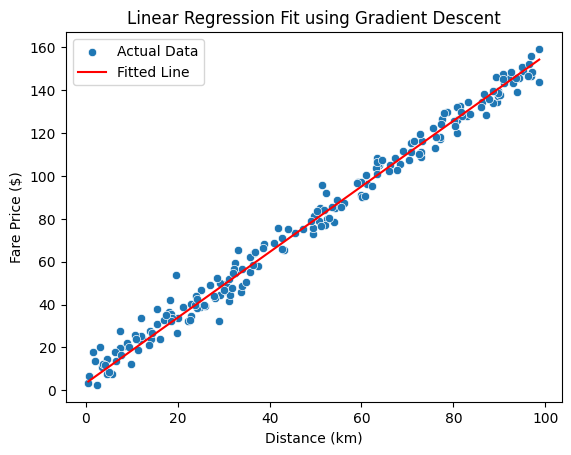

In [ ]:
sns.scatterplot(x=distance_array, y=fare_array, label='Actual Data')
x_line = np.linspace(min(distance_array), max(distance_array), 100)
y_line = optimized_weight * x_line + optimized_bias

sns.lineplot(x=x_line, y=y_line, color='red', label='Fitted Line')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Price ($)')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.show()

In [ ]:
def predict_fare(x):
    target = prediction(x,optimized_weight, optimized_bias)
    print(f"the fare amount is \"{float(round(target,2))}\" dollars for \"{x}\" kilometers.")

In [ ]:
predict_fare(4500)

the fare amount is "6887.78" dollars for "4500" kilometers.
